In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import httplib, urllib, base64, json
from firebase import firebase
from pygame import mixer
mixer.init()
mixer.music.load("aaaa.mp3")

In [3]:
firebase = firebase.FirebaseApplication('https://womensecurity-76b50.firebaseio.com', None)
def post_data(data):
    result = firebase.post('/', {'data': data})
    print result

In [4]:
def get_data():
    headers = {
        # Request headers
        'Content-Type': 'application/octet-stream',
        'Ocp-Apim-Subscription-Key': 'e3925161559045548886997ed3b205e8',
    }

    params = urllib.urlencode({
        # Request parameters
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'emotion,gender',
    })

    try:
        body = "" 
        filename = 'Dolly.jpeg'
        f = open(filename, "rb")
        body = f.read()
        f.close()
        
        conn = httplib.HTTPSConnection('southeastasia.api.cognitive.microsoft.com')
        conn.request("POST", "/face/v1.0/detect?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()
        conn.close()
        return data
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

In [5]:
import pandas as pd
data = pd.read_csv('molest.csv')
data.head()

,Anger,Contempt,Disgust,Fear,Happy,Neautral,Sad,Surprise,Label
0,0.000,0.000,0.0,0.000,1.000,0.000,0.000,0.000,0
1,0.001,0.001,0.0,0.019,0.000,0.842,0.129,0.007,0
2,0.000,0.000,0.0,0.000,1.000,0.000,0.000,0.000,0
3,0.000,0.000,0.0,0.000,0.003,0.996,0.000,0.000,0
4,0.000,0.000,0.0,0.000,0.000,0.998,0.001,0.000,0


In [6]:
train_x = data.values[:,:8]
train_y = data.values[:,8]

lr = LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

[{"faceId":"4b85a151-203b-4a2a-b038-92141b7c52b7","faceRectangle":{"top":231,"left":507,"width":337,"height":337},"faceAttributes":{"gender":"male","emotion":{"anger":0.0,"contempt":0.0,"disgust":0.0,"fear":0.0,"happiness":1.0,"neutral":0.0,"sadness":0.0,"surprise":0.0}}}]
gender  male
Raise alarm
{u'name': u'-LYHkbgB8AGY7CJ29_nn'}


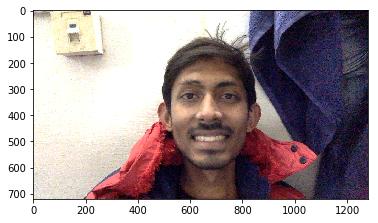

[{"faceId":"307edec9-3eab-4bcb-92ea-d6433045f794","faceRectangle":{"top":261,"left":530,"width":337,"height":337},"faceAttributes":{"gender":"male","emotion":{"anger":0.0,"contempt":0.009,"disgust":0.0,"fear":0.0,"happiness":0.981,"neutral":0.009,"sadness":0.0,"surprise":0.0}}}]
gender  male
Raise alarm
{u'name': u'-LYHkdPYNYBf5sSpDvIB'}


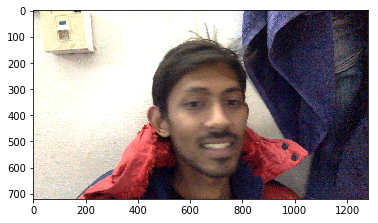

[{"faceId":"901e2094-f98f-4a84-8f5c-9b50d6552444","faceRectangle":{"top":281,"left":480,"width":342,"height":342},"faceAttributes":{"gender":"male","emotion":{"anger":0.0,"contempt":0.0,"disgust":0.0,"fear":0.0,"happiness":0.032,"neutral":0.966,"sadness":0.001,"surprise":0.002}}}]
gender  male
Raise alarm


KeyboardInterrupt: 

In [7]:
cam = cv2.VideoCapture(0)
data = []
ix = 0

while True:
    ret, frame = cam.read()
    if ret == True :
        ix+=1
        if ix%50 == 0:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            cv2.imwrite('Dolly.jpeg',frame)
            dt = get_data()
            print dt
            fc = json.loads(dt)[0]['faceAttributes']
            gender = fc['gender']
            print "gender ",gender
            temp = []
            for jx in fc['emotion'].values():
                temp.append(jx)
            if lr.predict([temp]) == 1 or gender=='male' :
                print "Raise alarm"
                post_data(1)
                mixer.music.play()
            if cv2.waitKey(1) ==27:
                exit(0)
            plt.imshow(frame)
            plt.show()

cv2.destroyAllWindows()
del cam